In [1]:
import numpy as np
from matplotlib import pyplot as plt

import sys
from pathlib import Path
import shutil
import timeit
import pickle
from copy import deepcopy
import math

In [2]:
util_dir = Path.cwd().parent.joinpath('Utility')
sys.path.insert(1, str(util_dir))
from Information import *
from HitGenerators import Event_V2 as Event

In [3]:
dp_list = ['train_CeEndpoint-mix-fromCSV_1',\
                'train_CeEndpoint-mix-fromCSV_3',\
                'train_CeEndpoint-mix-fromCSV_2',\
                'train_CeEndpoint-mix-fromCSV_4',\
                'train_CeEndpoint-mix-fromCSV_5',\
                'train_CeEndpoint-mix-fromCSV_6']
track_dir = Path.cwd().parent.parent.joinpath('tracks')
db_files = [track_dir.joinpath(dp+'.db') for dp in dp_list]
gen = Event(db_files=db_files, hitNumCut=10)

[INFO]: Getting ids for event: 933/933
[INFO]: Constructing iterators
[INFO]: Getting StrawHits


In [4]:
delta_ts = []
for i in range(1000):
    hit_all, track_all = gen.generate(mode='eval')
    for trkIdx, hitIdcPdgId in track_all.items():
        hitIdc = hitIdcPdgId[:-1]
        hitsPerTrack = [hit_all[idx] for idx in hitIdc]
        ts = [hit[3] for hit in hitsPerTrack]
        delta_t = max(ts)-min(ts)
        if delta_t > 100:
            continue
        delta_ts.append(delta_t)


[INFO]: Run out of particles
[INFO]: Connecting to the next track database
[INFO]: Getting ids for event: 932/932
[INFO]: Constructing iterators
[INFO]: Getting StrawHits


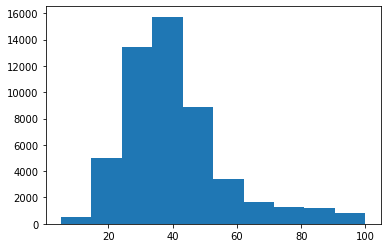

In [5]:
plt.hist(delta_ts)
plt.show()